In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [114]:
aviva = pd.read_csv("AvivaView.csv")

In [115]:
aviva.columns

Index(['Row Labels', 'Targeting', 'Recency', 'Sum of Viewability',
       'Sum of Active View: Measurable Impressions',
       'Sum of Active View: Viewable Impressions', 'Sum of Impressions',
       'Sum of Quotes', 'Sum of Spend', 'Viewgroup'],
      dtype='object')

In [116]:
aviva.columns = ['Key', 'Targeting', 'Recency', 'Viewability',
       'MeasurableImpressions',
       'ViewableImpressions', 'Impressions',
       'Quotes', 'Spend', 'Viewgroup']

In [117]:
aviva.tail(17)

,Key,Targeting,Recency,Viewability,MeasurableImpressions,ViewableImpressions,Impressions,Quotes,Spend,Viewgroup
722,Start quote__O-CV5S_Aviva_UK_AD_2016_Jan_Car I...,Start quote,NaN,#DIV/0!,0.0,0.0,0.0,2.0,0.0,#DIV/0!
723,Start quote__O-CV5S_Aviva_UK_AD_2016_Jan_Car I...,Start quote,NaN,#DIV/0!,0.0,0.0,0.0,1.0,0.0,#DIV/0!
724,____,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,#DIV/0!
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%
729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%
731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30%


In [118]:
aviva = aviva.drop(aviva.index[724:])

In [119]:
aviva.head()

,Key,Targeting,Recency,Viewability,MeasurableImpressions,ViewableImpressions,Impressions,Quotes,Spend,Viewgroup
0,Car homepage__O-GGF8_Aviva_UK_AD_2016_April_Ca...,Car homepage,NaN,0.838497755,9133.0,7658.0,9253.0,1.0,31.848713,70%+
1,Car homepage__O-FZKM_Aviva_UK_AD_2016_Mar_Car ...,Car homepage,NaN,0.83355128,10706.0,8924.0,10909.0,1.0,38.151969,70%+
2,Car homepage__O-HZNC_Aviva_UK_AD_2016_June_Car...,Car homepage,NaN,0.831478448,17701.0,14718.0,18293.0,NaN,63.331883,70%+
3,Car homepage__O-F5QT_Aviva_UK_AD_2016_Feb_Car ...,Car homepage,NaN,0.823856649,17077.0,14069.0,17408.0,4.0,66.937527,70%+
4,Car homepage__O-HZNC_Aviva_UK_AD_2016_June_Car...,Car homepage,NaN,0.814862316,53020.0,43204.0,53829.0,16.0,222.033123,70%+


In [120]:
aviva = aviva.drop(aviva.Key == "Grand Total")

In [121]:
aviva = aviva.drop(aviva.index[aviva.Targeting == "Grand Total"])

In [139]:
aviva["CPM"] = aviva.Spend / aviva.Impressions * 1000
aviva["CPQ"] = aviva.Spend / aviva.Quotes
aviva["ViewQuotes"] = aviva.Quotes * (aviva.ViewableImpressions / aviva.MeasurableImpressions)
aviva["vCPQ"] = aviva.Spend / (aviva.Quotes * (aviva.ViewableImpressions / aviva.MeasurableImpressions))
aviva["Viewability"] = aviva.ViewableImpressions / aviva.MeasurableImpressions
aviva["QuoteRate"] = aviva.Quotes / aviva.Impressions
aviva["vQuoteRate"] = aviva.ViewQuotes / aviva.Impressions

In [123]:
aviva["Recency"][aviva["Recency"].isnull() == True] = "Others"

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [124]:
aviva["Viewgroup"] = 0
aviva["Viewgroup"][aviva.Viewability < 0.3999999] = 0.3
aviva["Viewgroup"][(aviva.Viewability < 0.4999999) & (aviva.Viewability > 0.4)] = 0.4
aviva["Viewgroup"][(aviva.Viewability < 0.5999999) & (aviva.Viewability > 0.5)] = 0.5
aviva["Viewgroup"][(aviva.Viewability < 0.6999999) & (aviva.Viewability > 0.6)] = 0.6
aviva["Viewgroup"][(aviva.Viewability < 0.7999999) & (aviva.Viewability > 0.7)] = 0.7
aviva["Viewgroup"][aviva.Viewability > 0.8] = 0.8

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


---

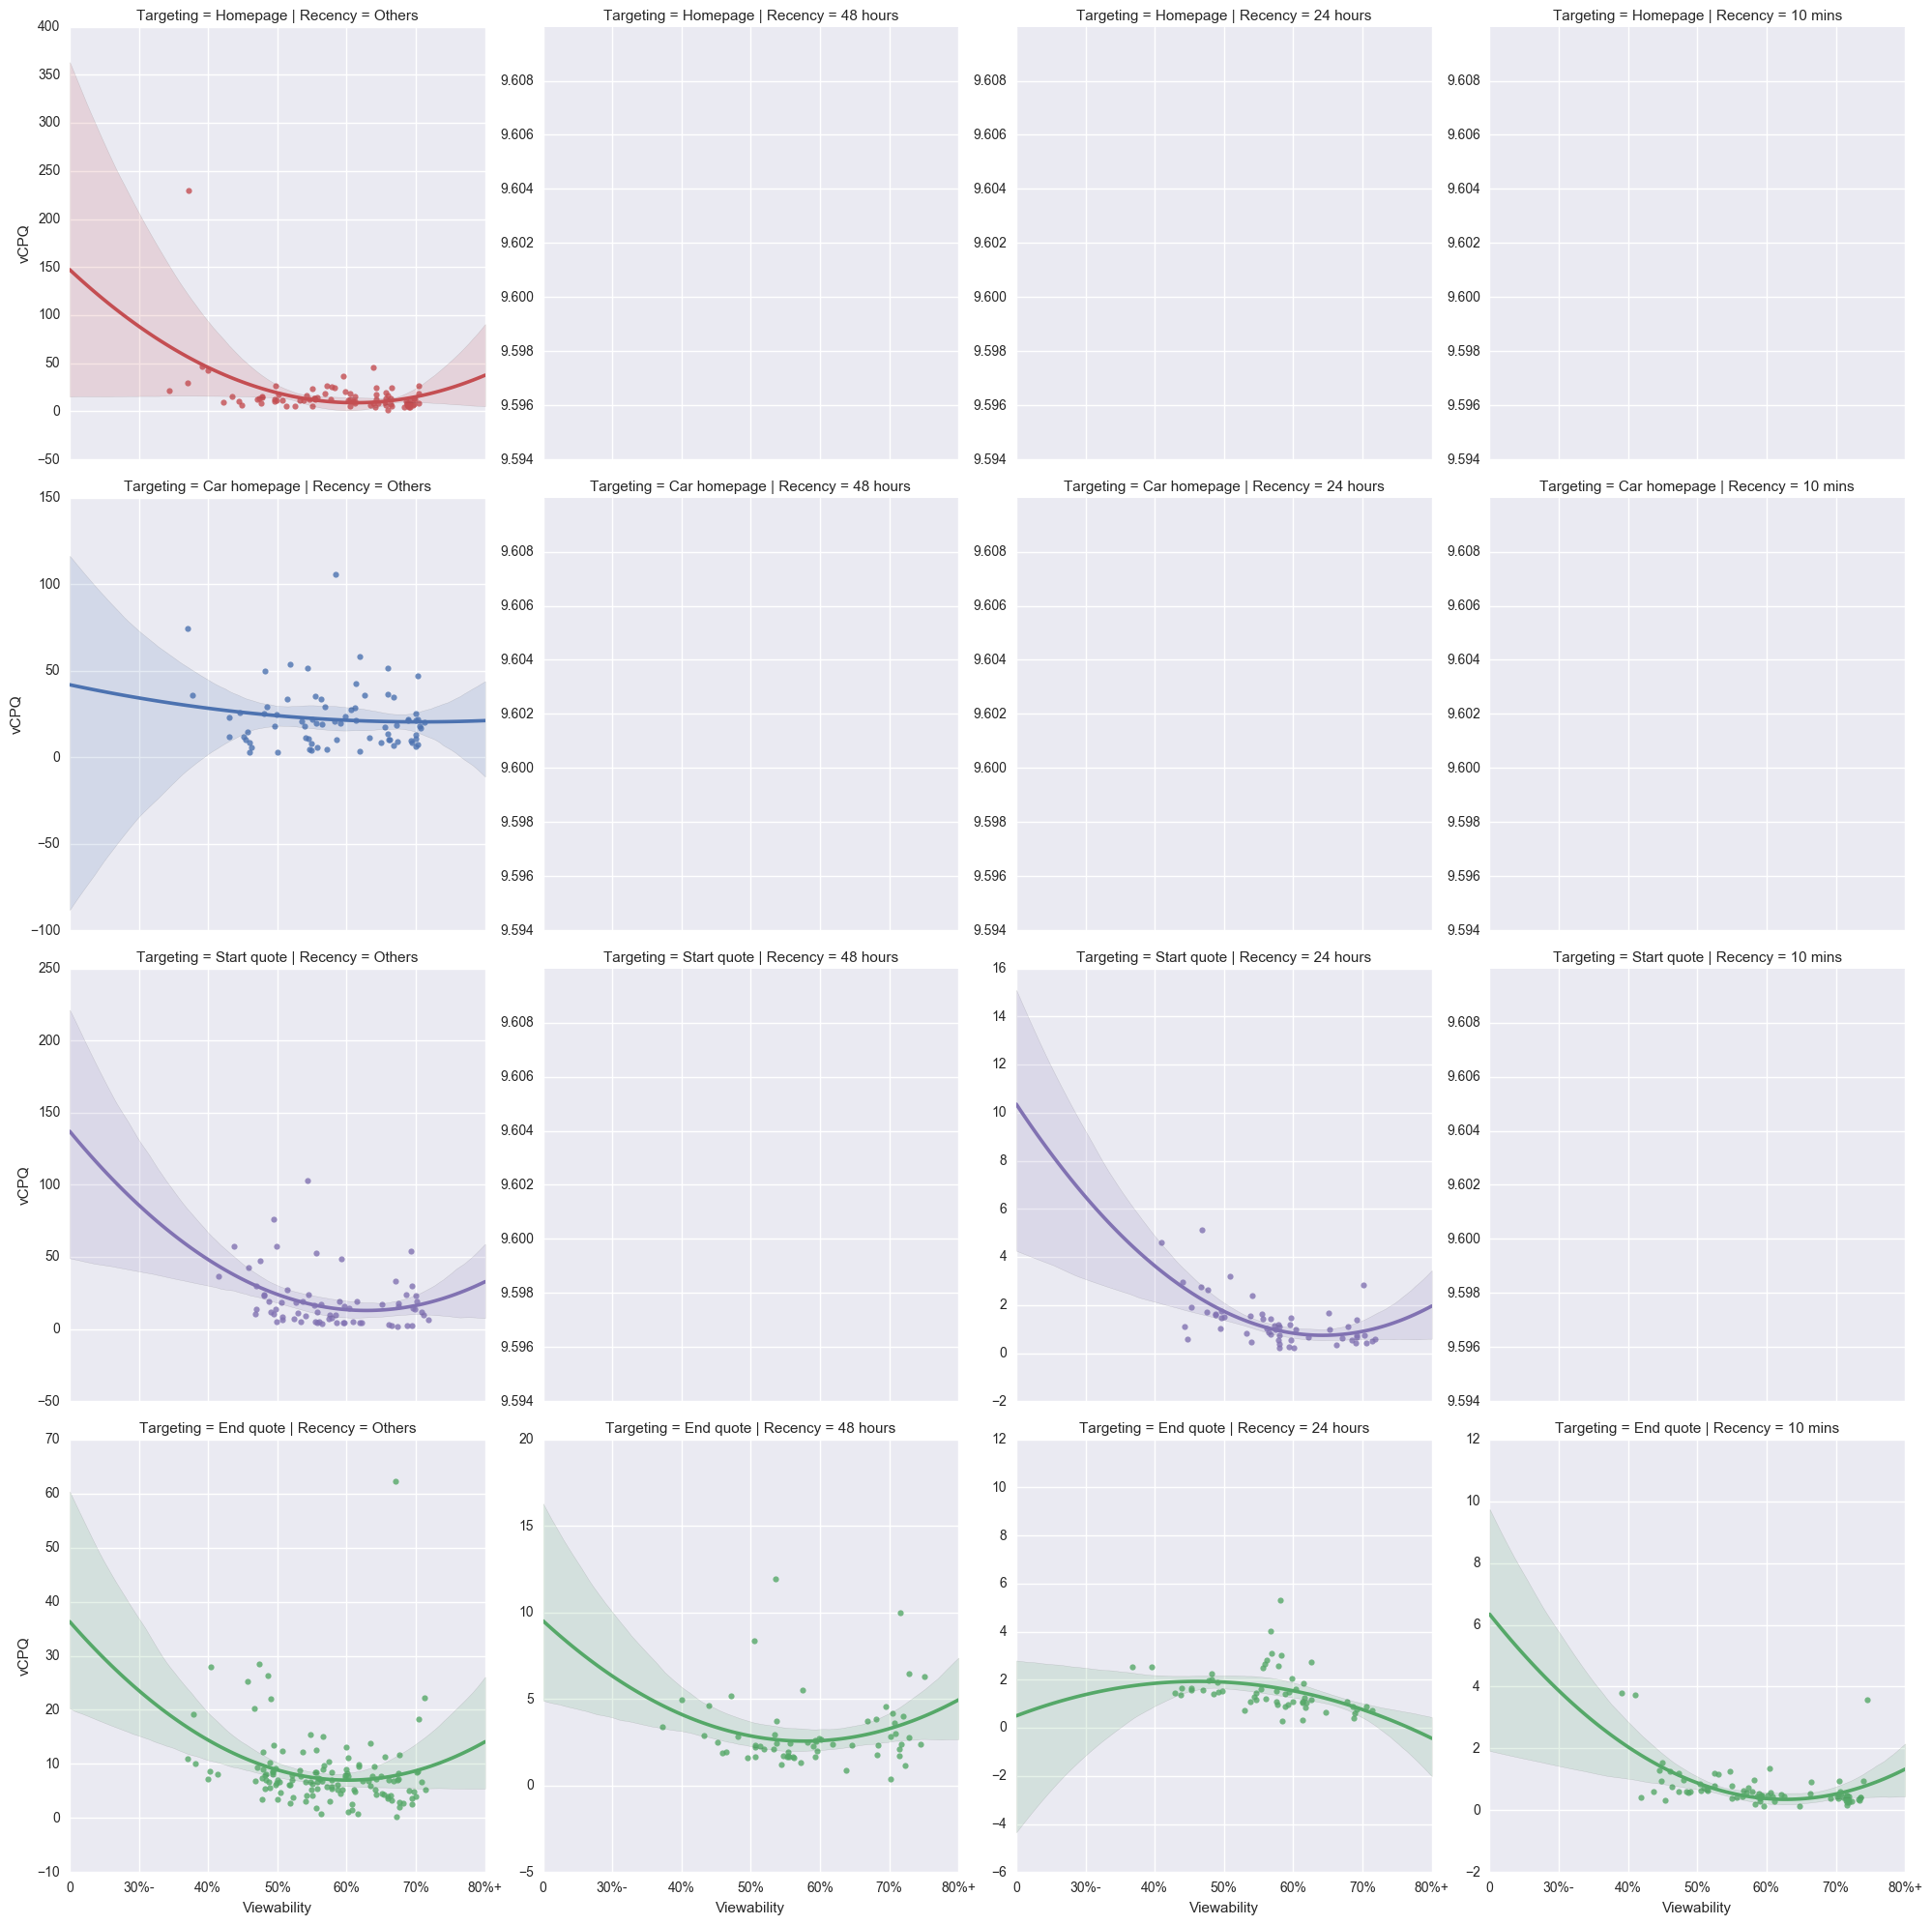

In [134]:
avivalmplot1 = sns.lmplot(data=aviva, x="Viewability", y="vCPQ", hue="Targeting", row="Targeting", col="Recency", order=2, 
           sharey=False, col_order=["Others", "48 hours", "24 hours", "10 mins"], 
          row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivalmplot1 = avivalmplot1.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

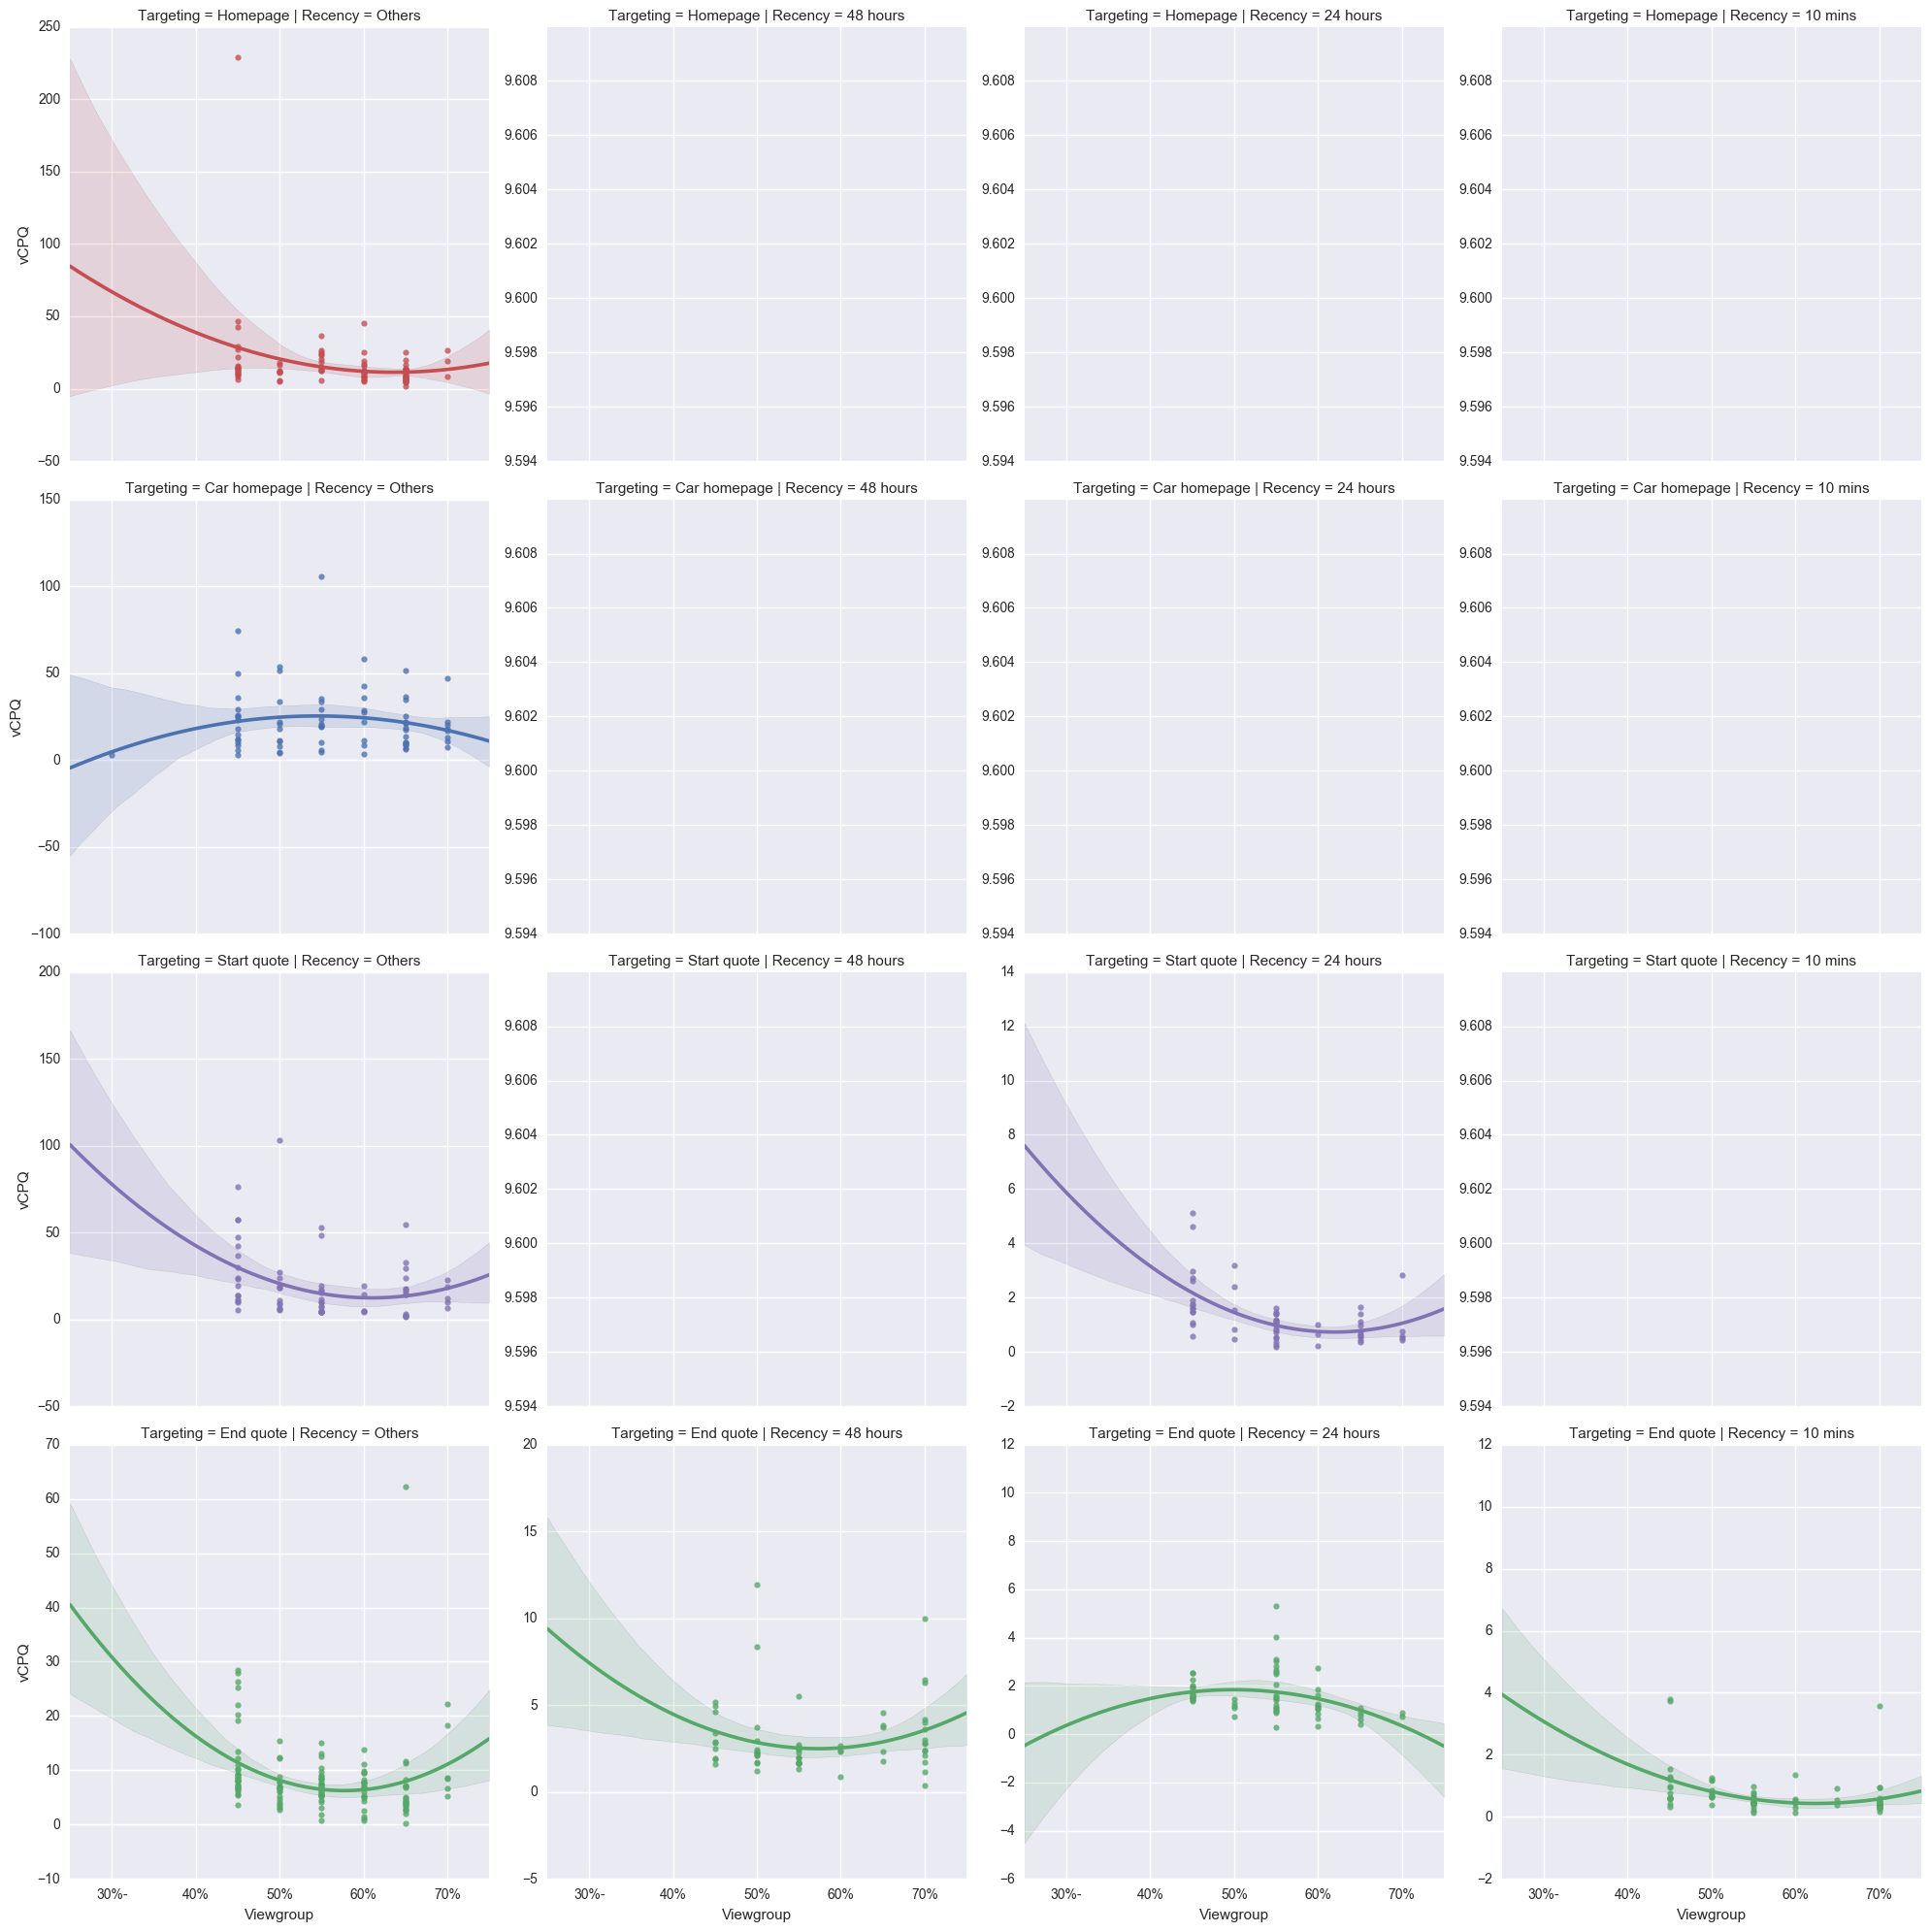

In [126]:
avivalmplot = sns.lmplot(data=aviva, x="Viewgroup", y="vCPQ", hue="Targeting", row="Targeting", col="Recency", order=2, 
           sharey=False, col_order=["Others", "48 hours", "24 hours", "10 mins"], 
          row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivalmplot = avivalmplot.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

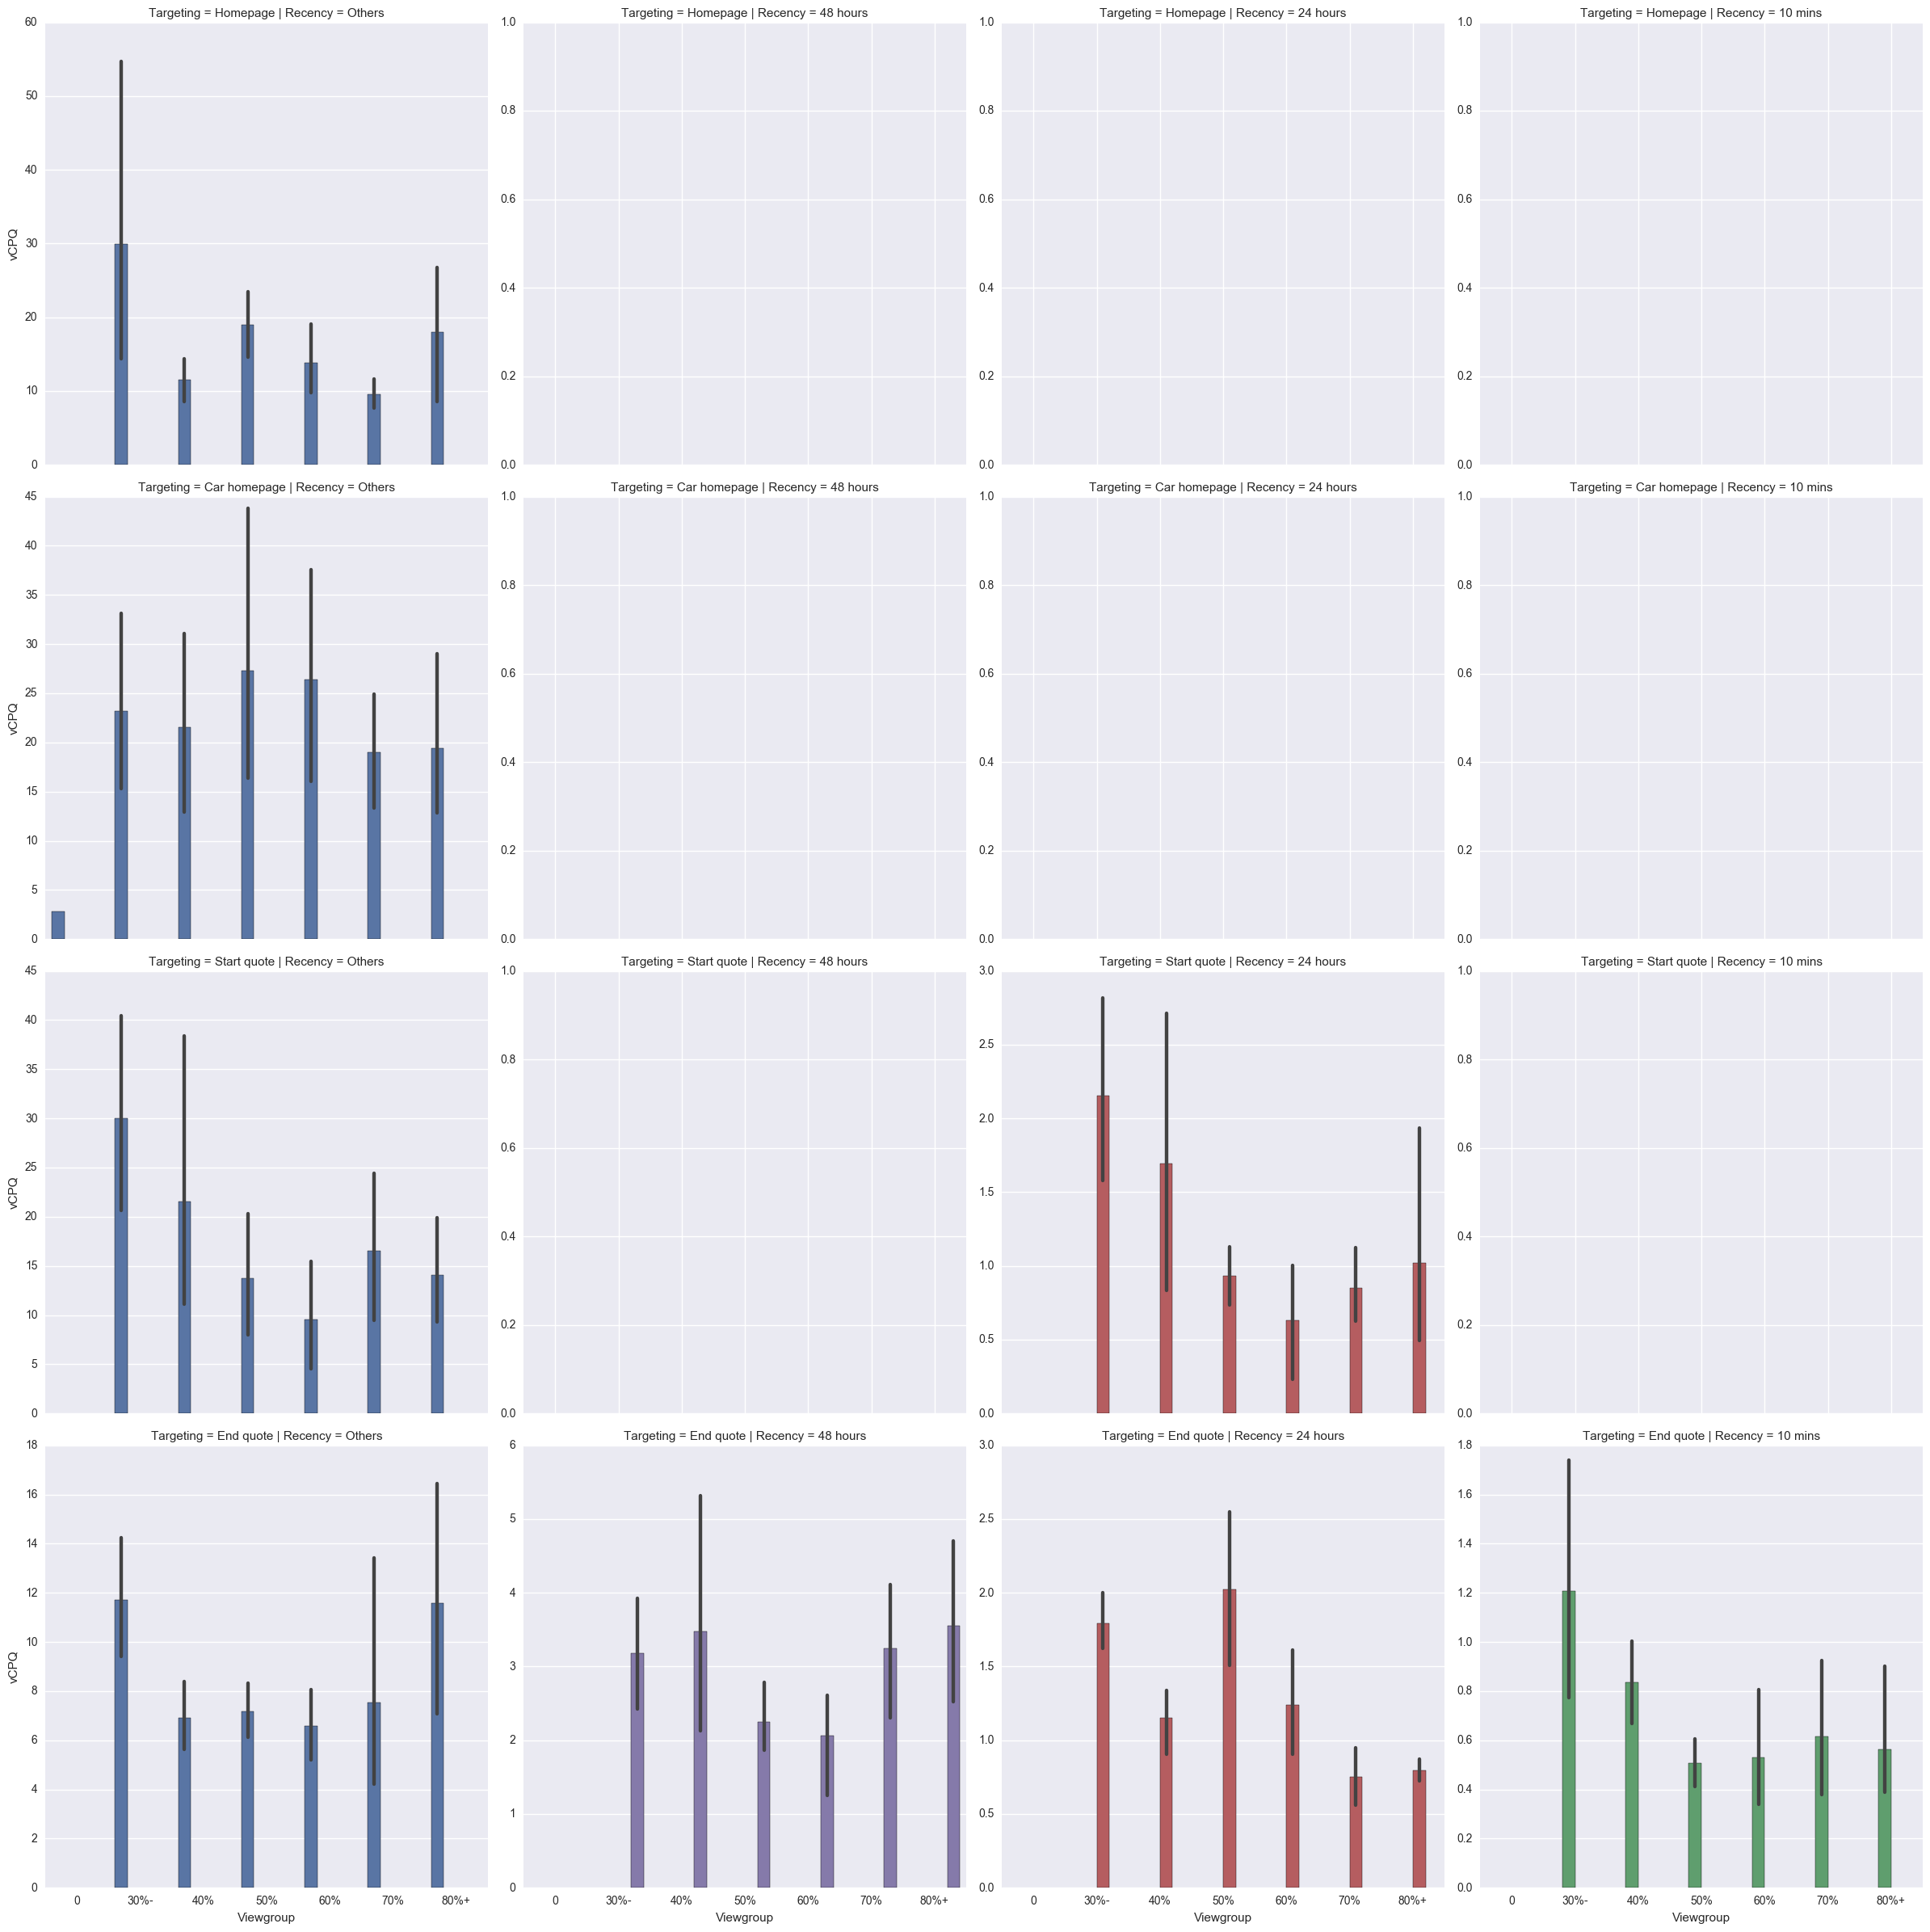

In [127]:
#chart to plot in bar style between vCPQ and Viewgroup on Targeting and Recency
avivafac = sns.factorplot(data=aviva, x="Viewgroup", y="vCPQ", kind="bar", 
               hue="Recency", size=6, col="Recency", row="Targeting", sharey=False,
              col_order=["Others", "48 hours", "24 hours", "10 mins"], 
              row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivafac = avivafac.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

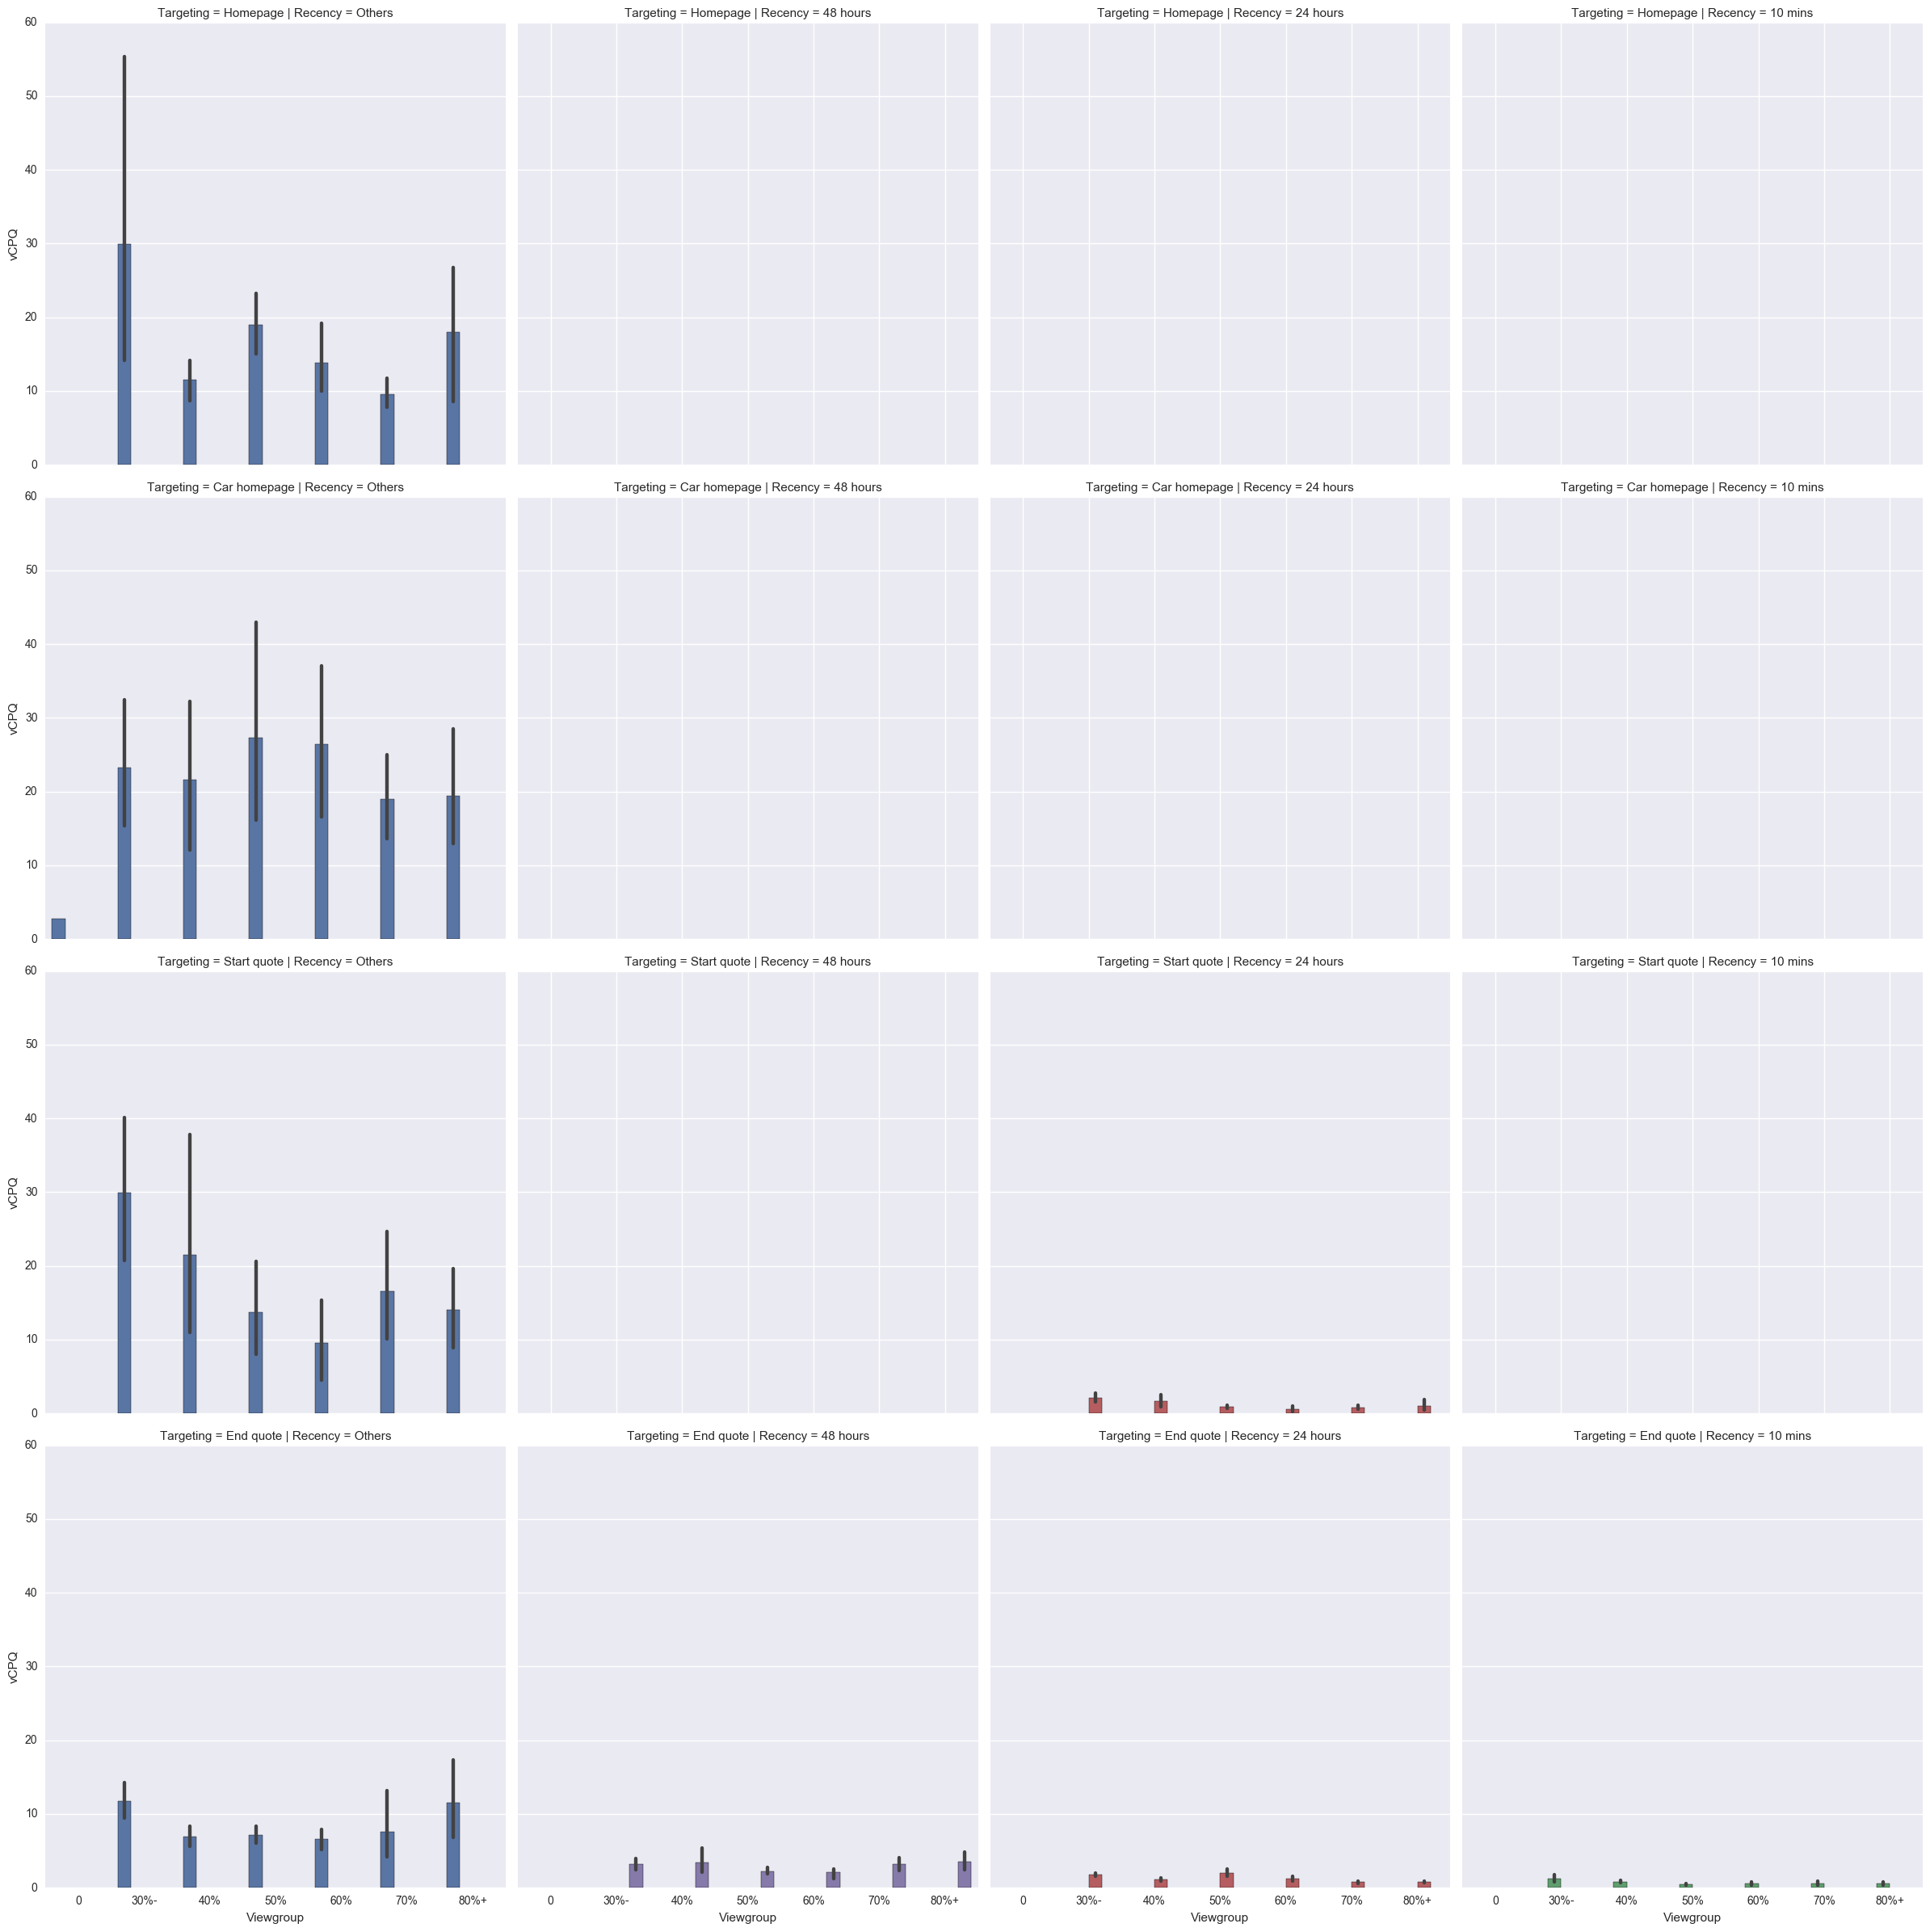

In [128]:
#same chart as above but with its own y scale
avivafac1 = sns.factorplot(data=aviva, x="Viewgroup", y="vCPQ", kind="bar", 
               hue="Recency", size=6, col="Recency", row="Targeting",
              col_order=["Others", "48 hours", "24 hours", "10 mins"], 
              row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivafac1 = avivafac1.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

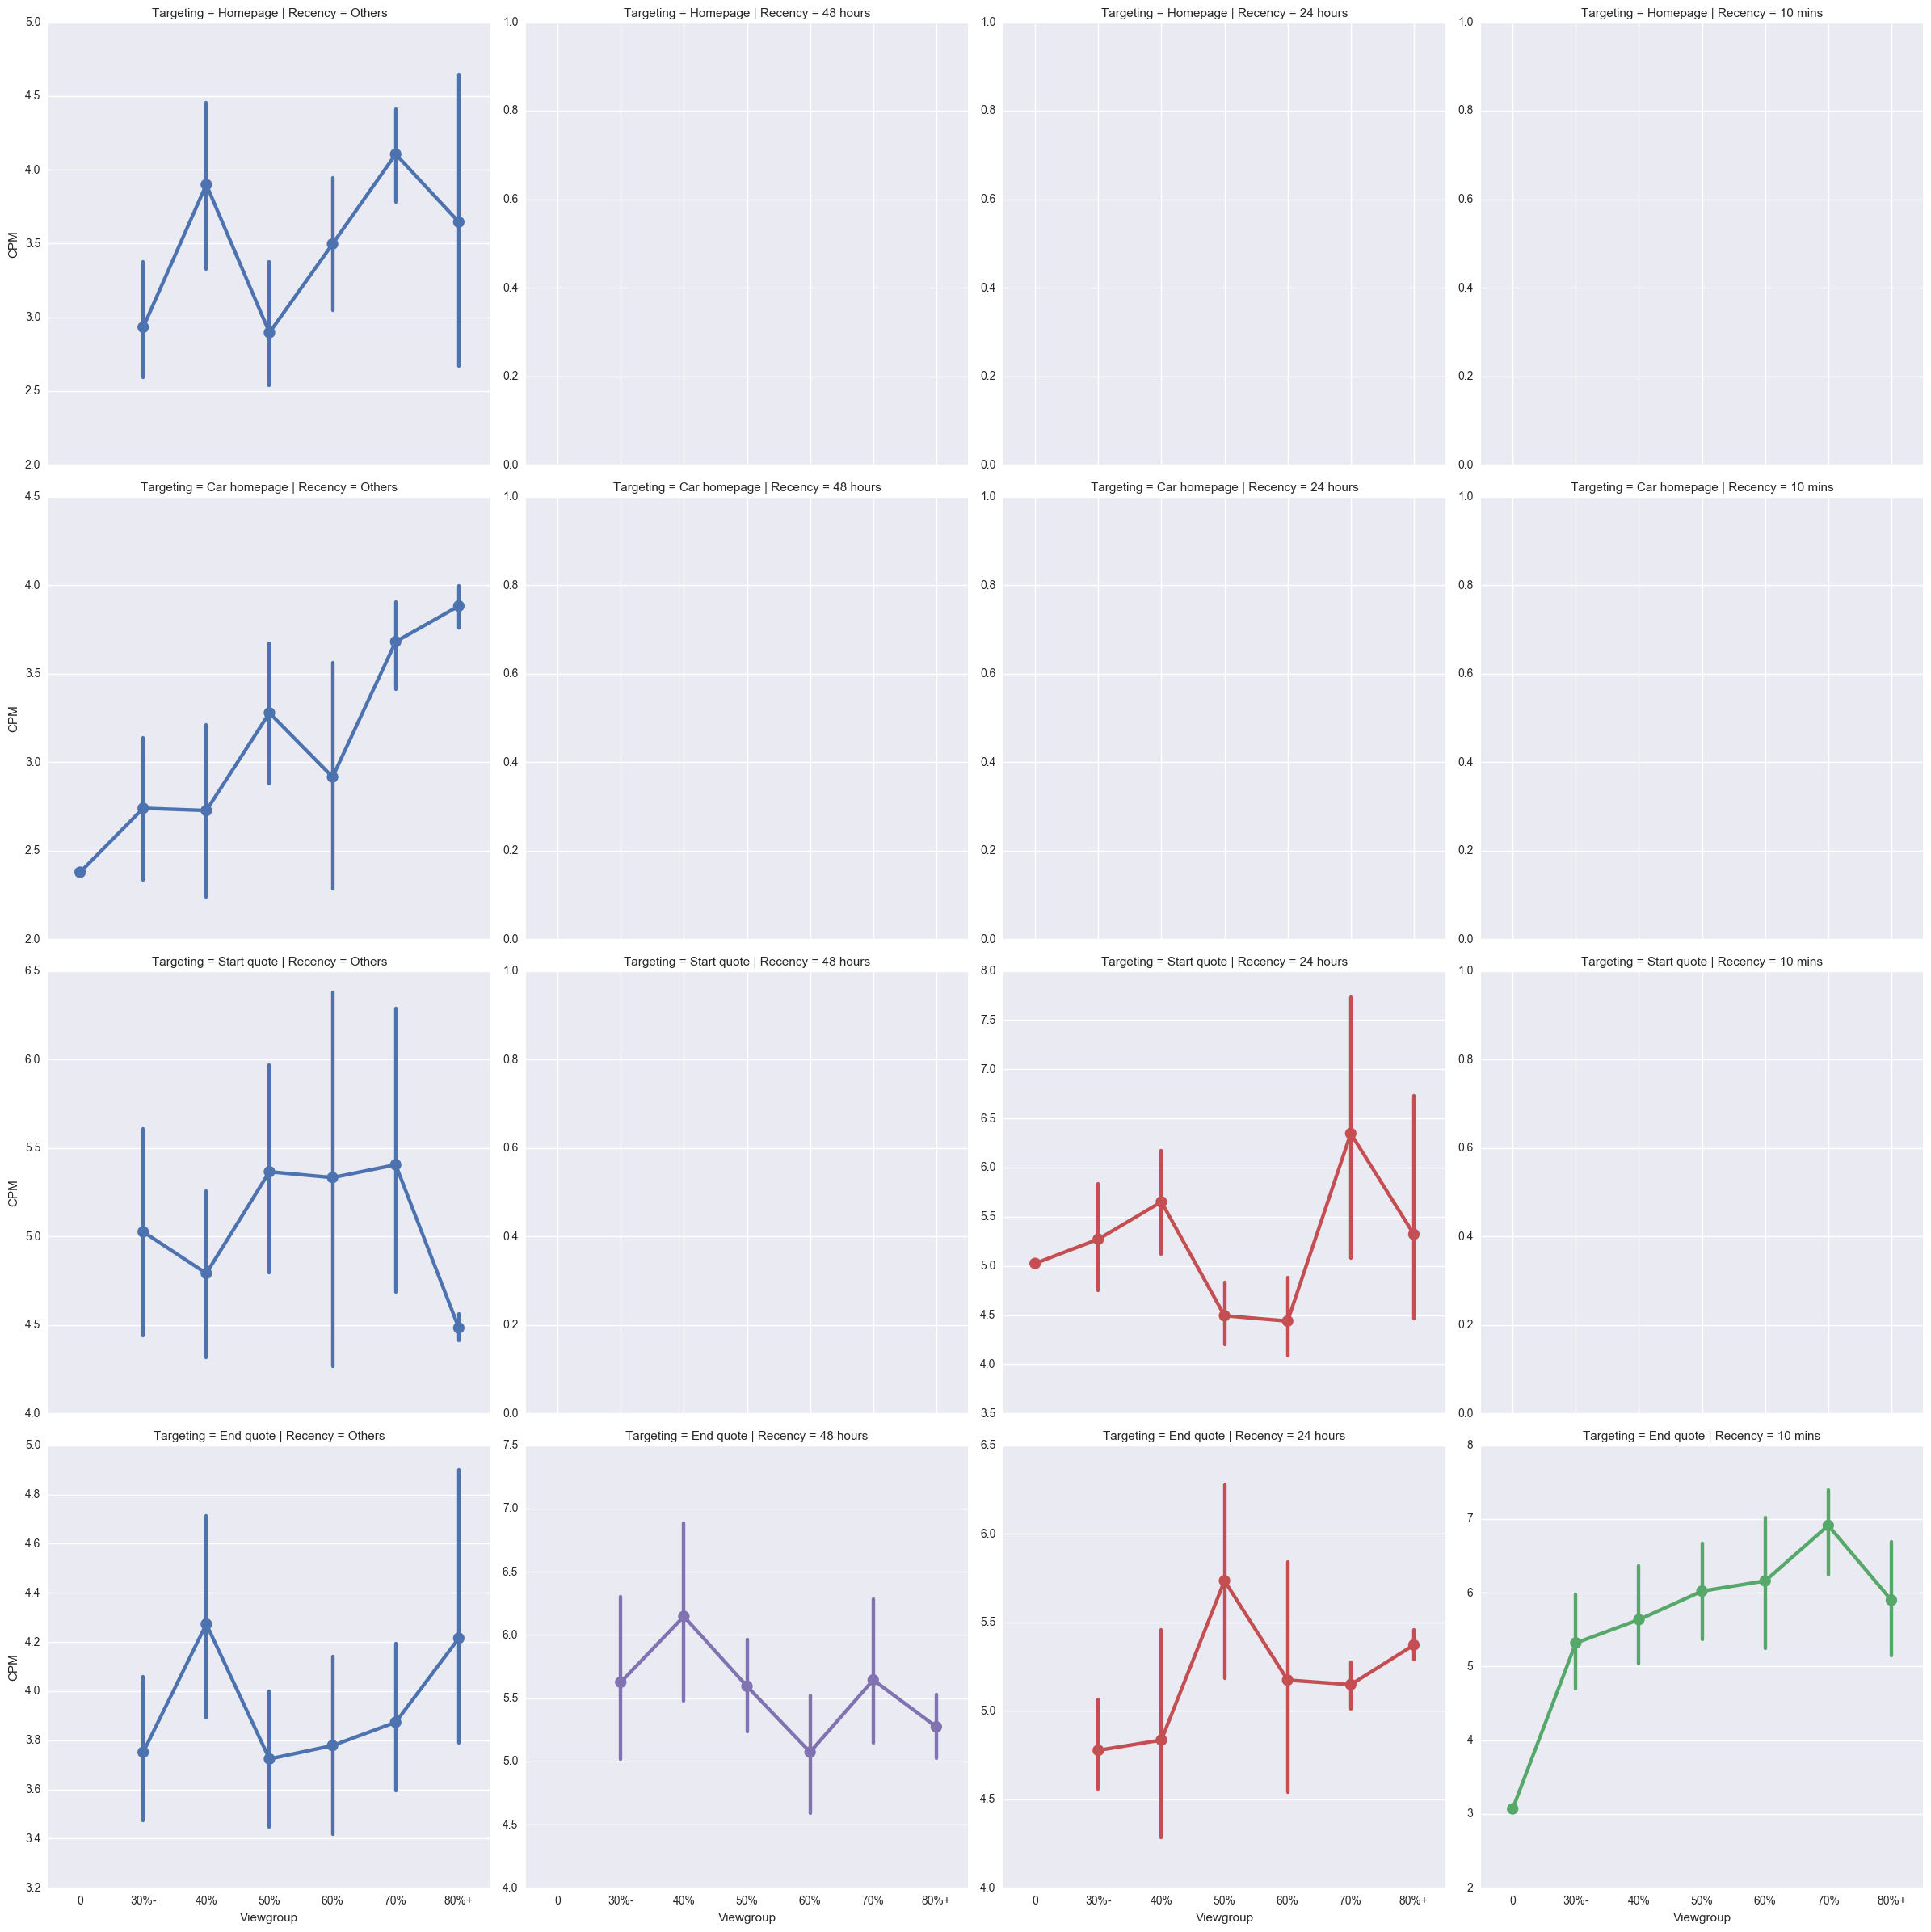

In [137]:
#chart to plot in bar style between CPM and Viewgroup on Targeting and Recency
avivaCPMchart = sns.factorplot(data=aviva, x="Viewgroup", y="CPM", 
               hue="Recency", size=6, col="Recency", row="Targeting", sharey=False,
              col_order=["Others", "48 hours", "24 hours", "10 mins"], 
              row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivaCPMchart = avivaCPMchart.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

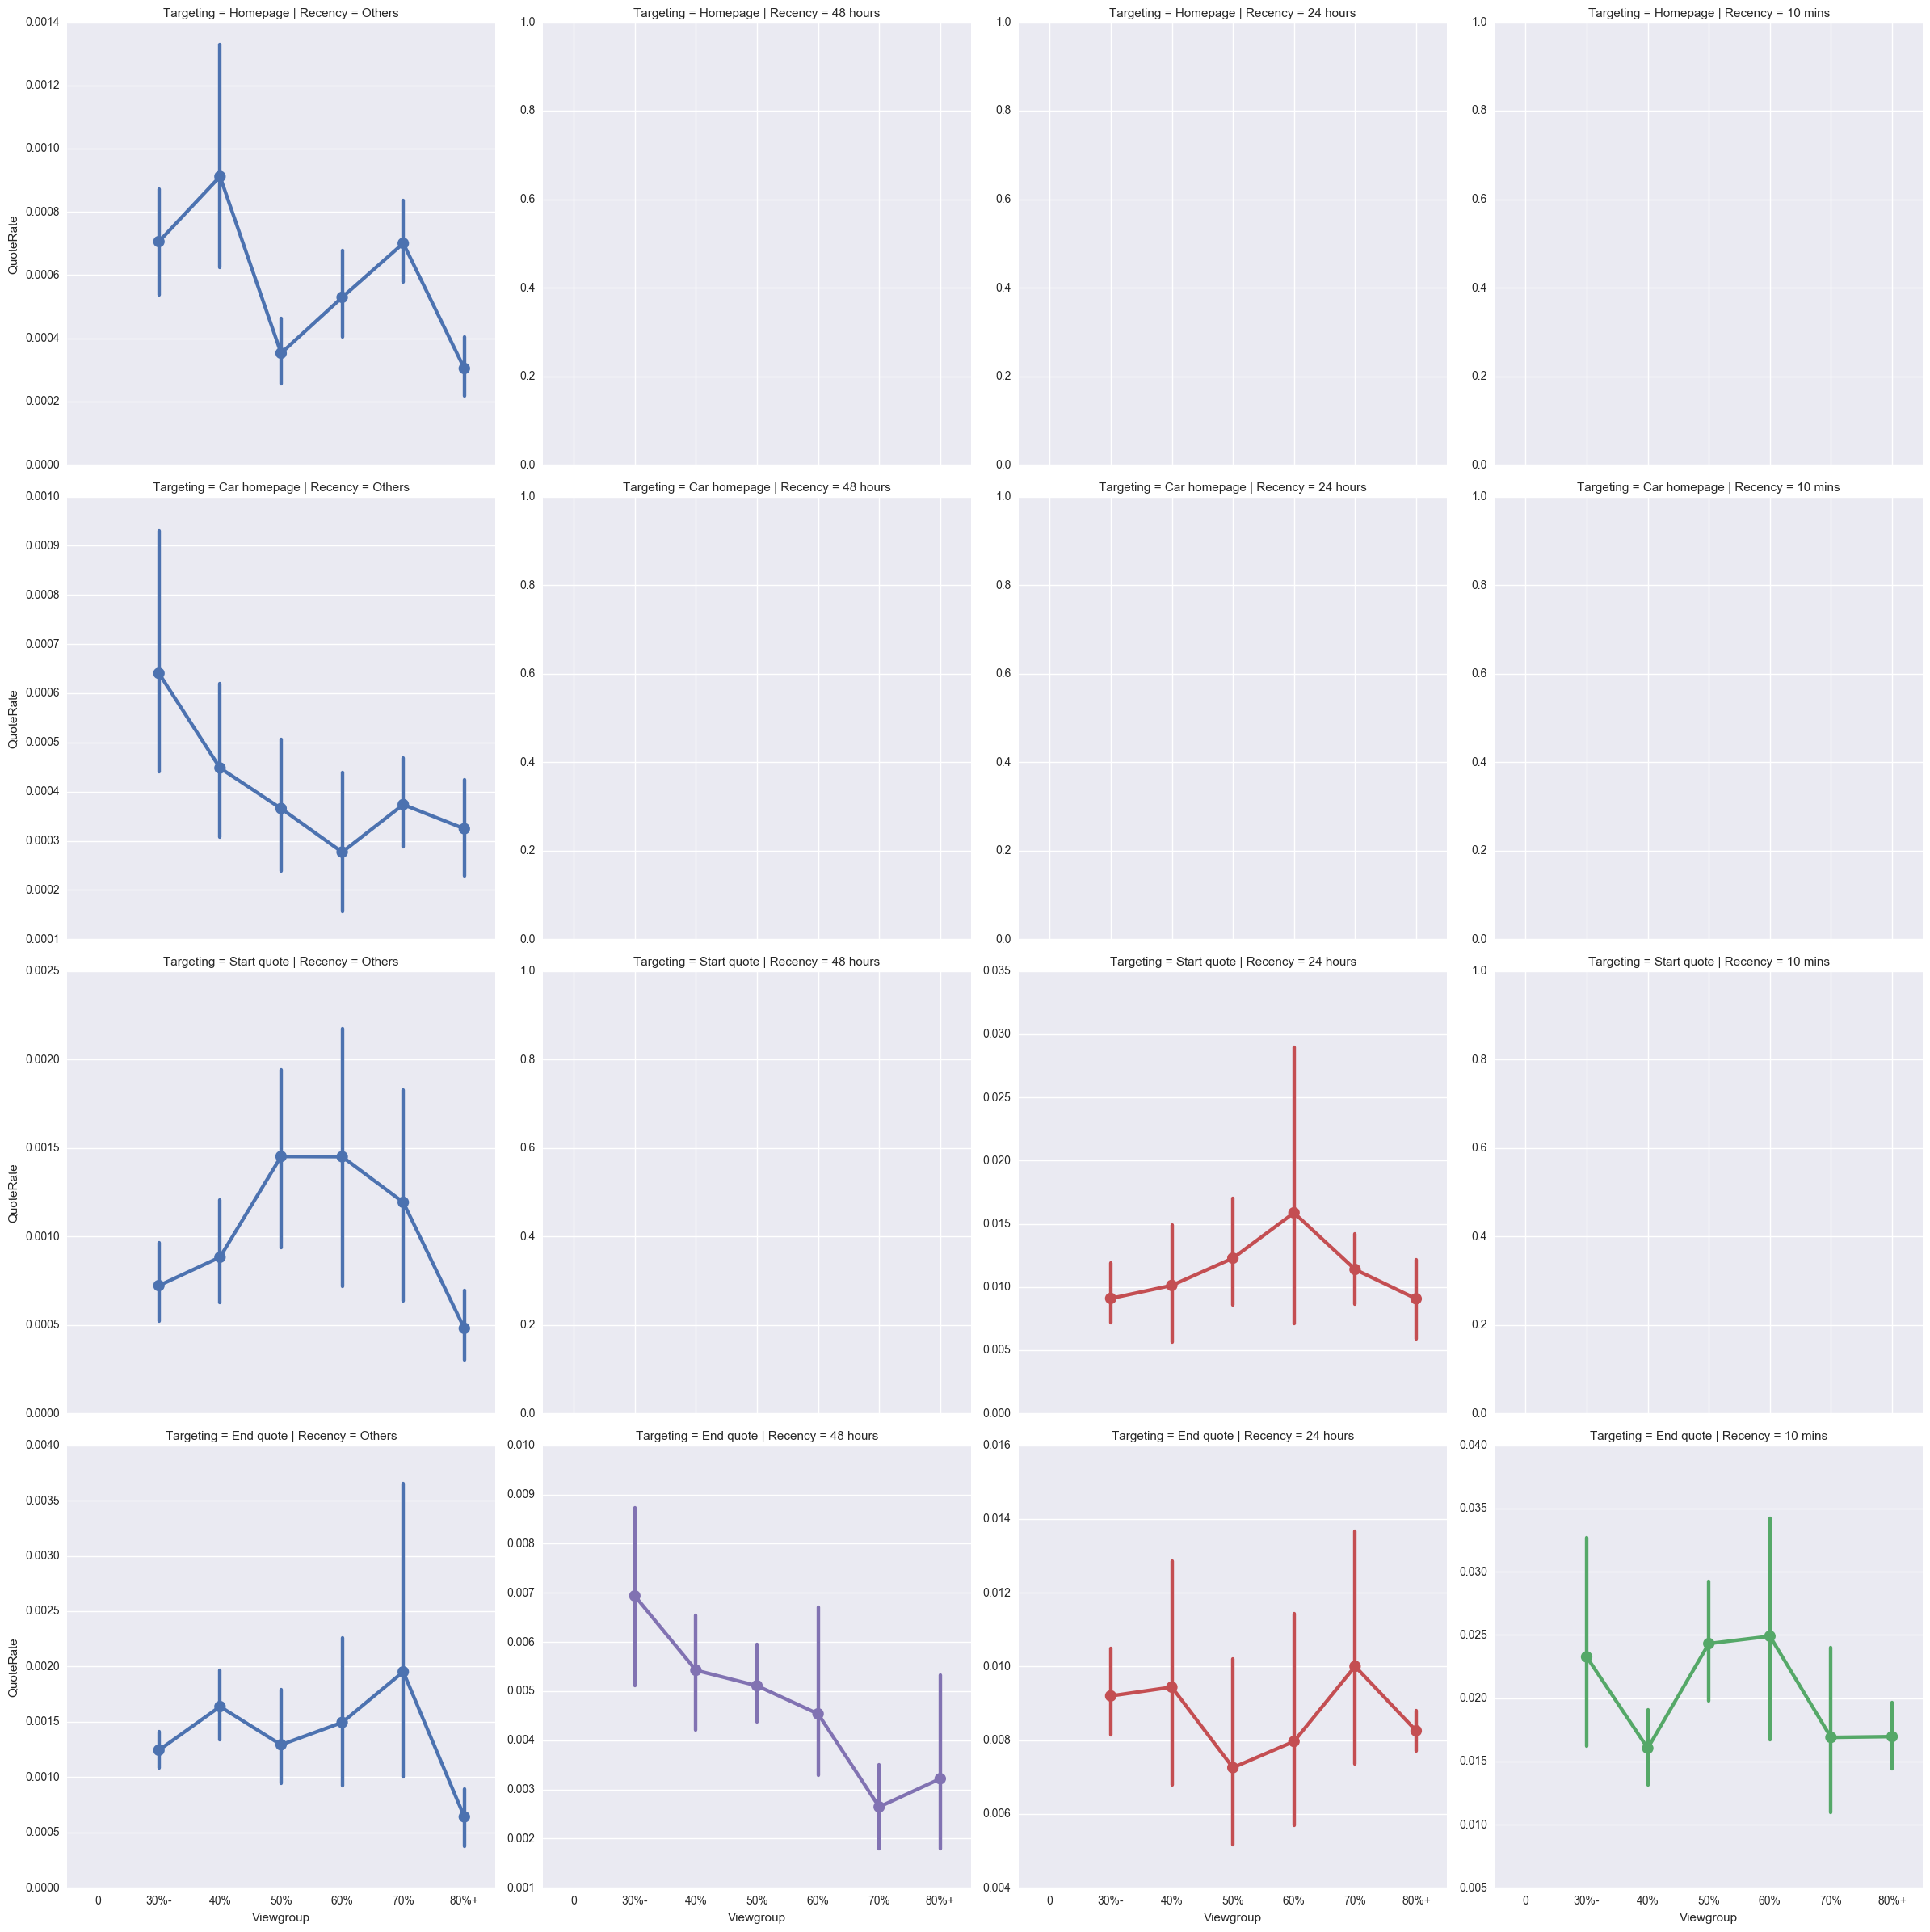

In [141]:
#chart to plot in bar style between quote rate and Viewgroup on Targeting and Recency
avivaQuoteRatechart = sns.factorplot(data=aviva, x="Viewgroup", y="QuoteRate", 
               hue="Recency", size=6, col="Recency", row="Targeting", sharey=False, 
              col_order=["Others", "48 hours", "24 hours", "10 mins"], 
              row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivaQuoteRatechart = avivaQuoteRatechart.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

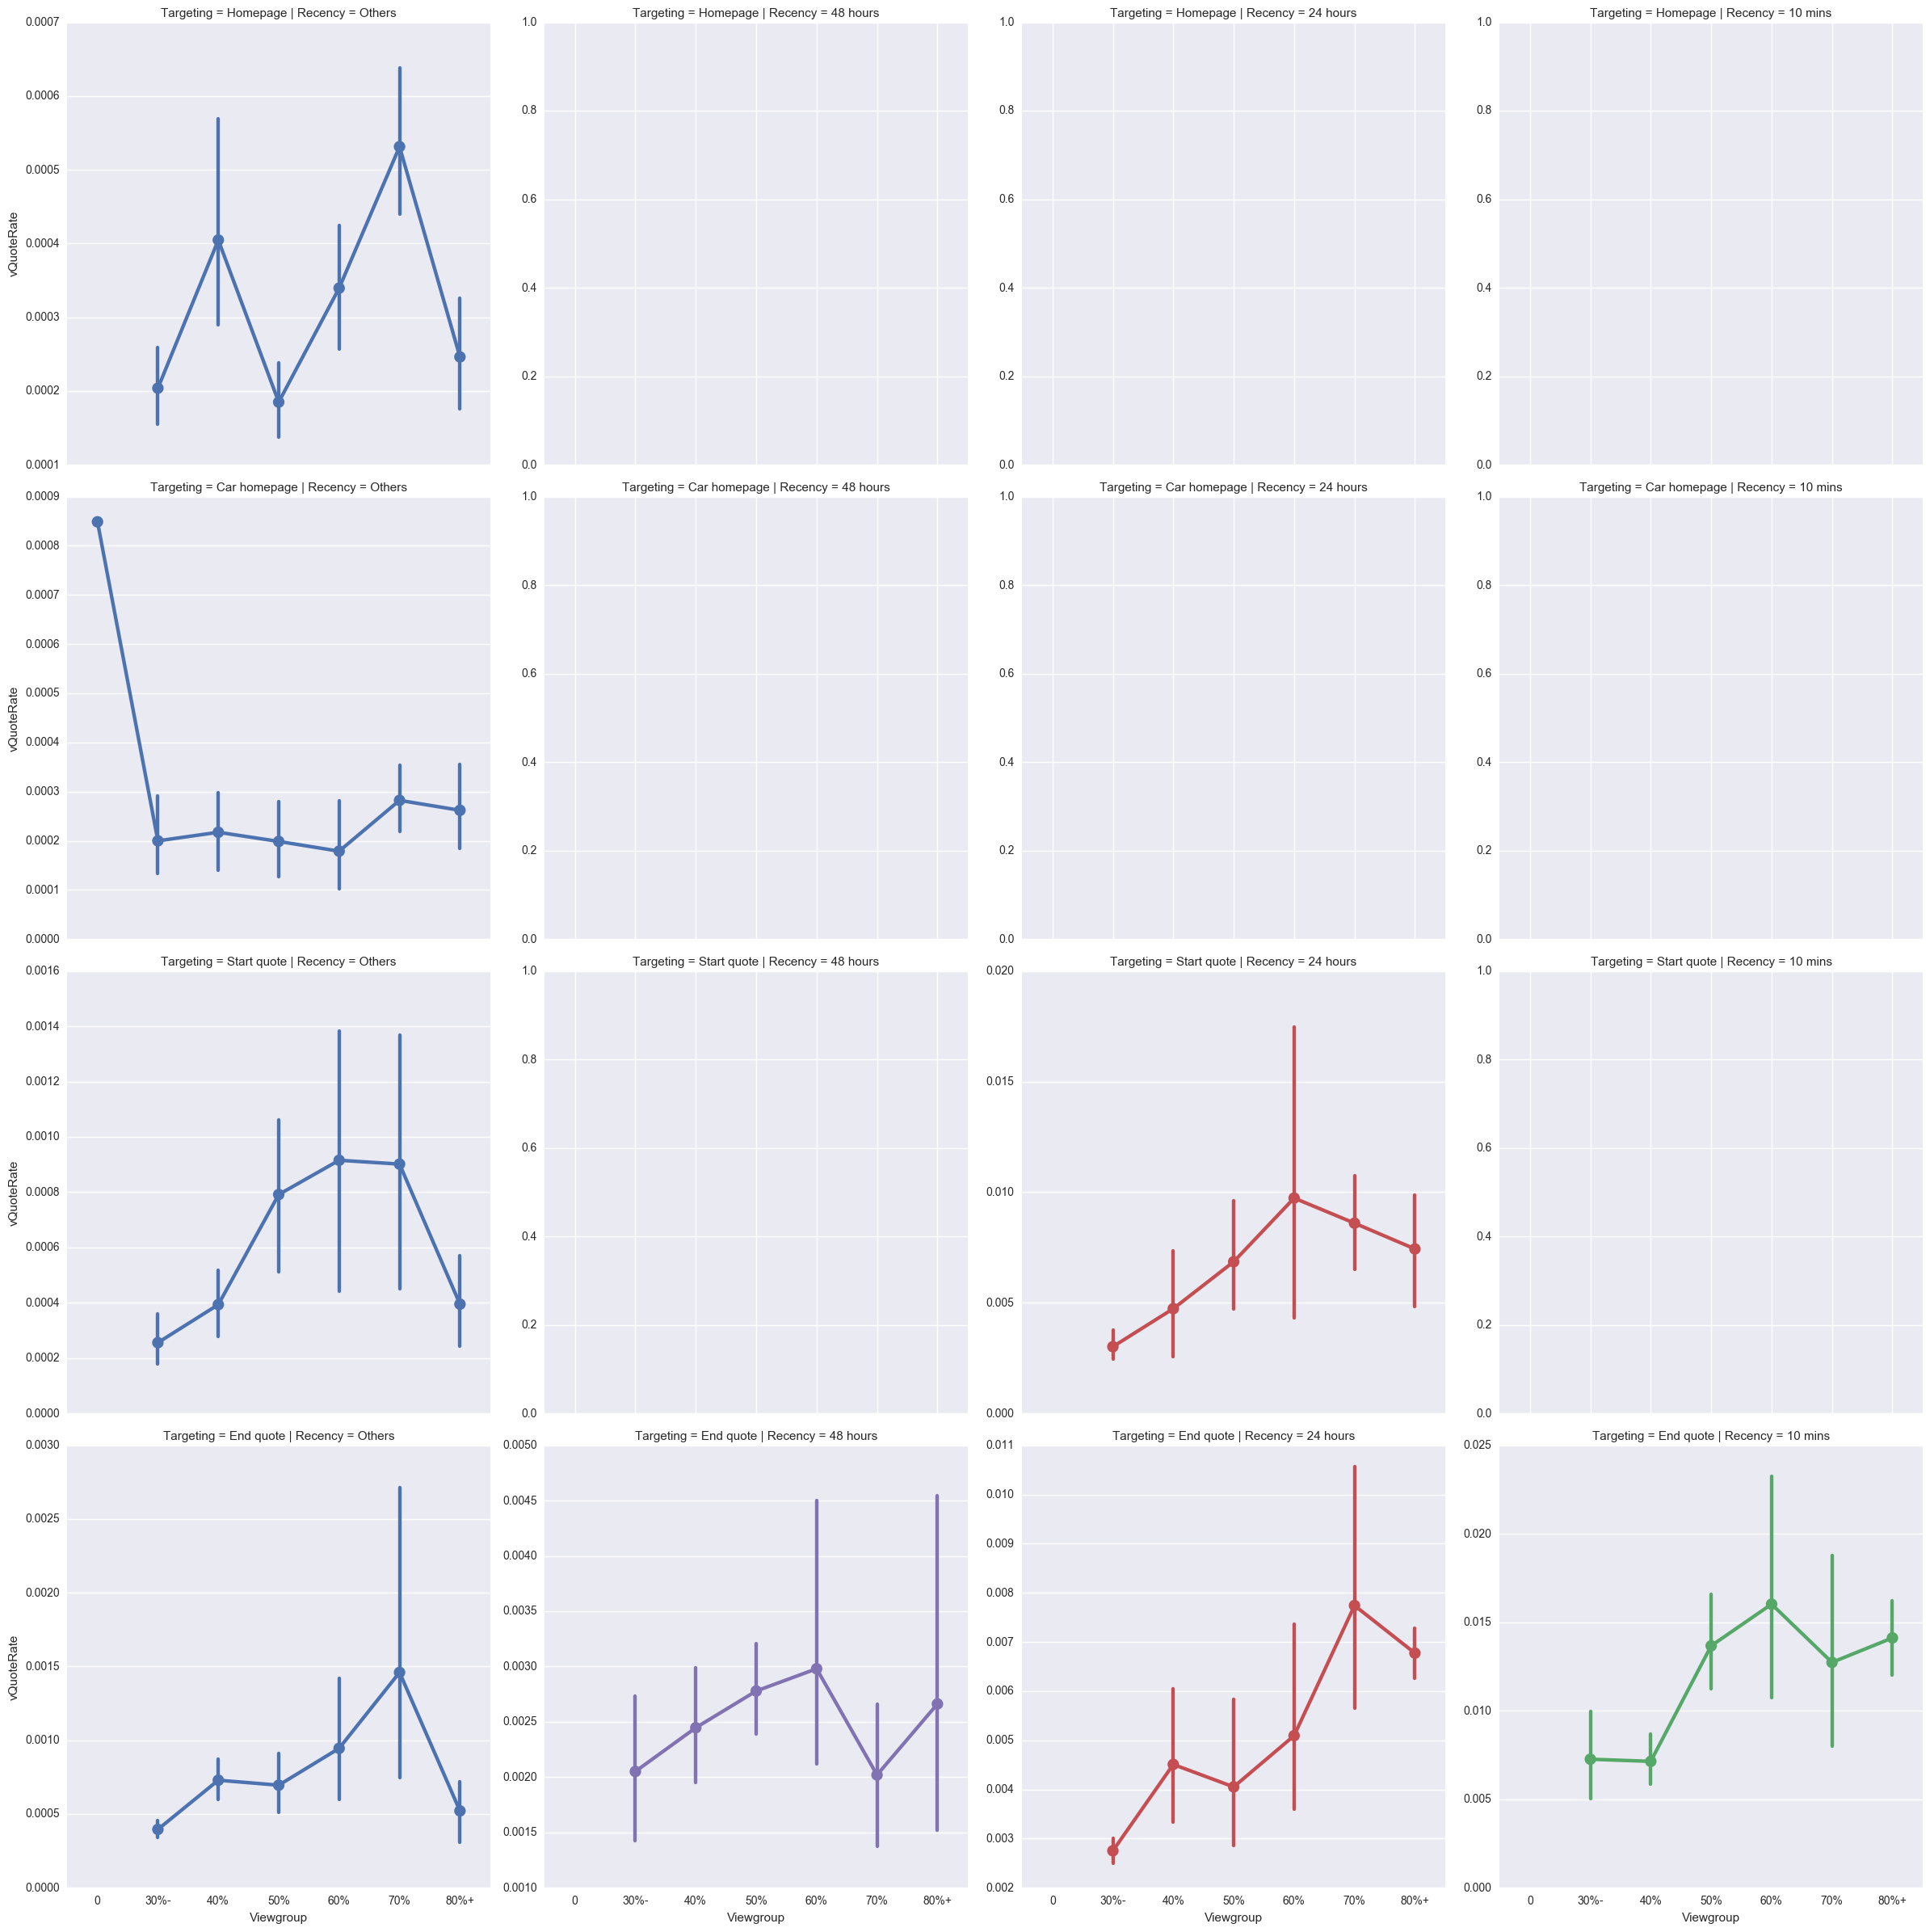

In [142]:
#chart to plot in bar style between viewable quote rate and Viewgroup on Targeting and Recency
avivaVQuoteRatechart = sns.factorplot(data=aviva, x="Viewgroup", y="vQuoteRate", 
               hue="Recency", size=6, col="Recency", row="Targeting", sharey=False, 
              col_order=["Others", "48 hours", "24 hours", "10 mins"], 
              row_order=["Homepage", "Car homepage", "Start quote", "End quote"])
avivaVQuoteRatechart = avivaVQuoteRatechart.set_xticklabels(["0", "30%-", "40%", "50%", "60%", "70%", "80%+"])

In [133]:
avivalmplot.savefig("vCPQvsViewgroup-lmplot.png")
avivafac.savefig("vCPQvsViewgroup-barplot.png")
avivafac1.savefig("vCPQvsViewgroup-barplot-Yadjust.png")
avivaQuoteRatechart.savefig("QuoteRatevsViewgroup-lineplot.png")

In [135]:
avivalmplot1.savefig("vCPQvsViewability-lmplot.png")

In [138]:
avivaCPMchart.savefig("CPMvsViewgroup-lmplot.png")

In [144]:
avivaVQuoteRatechart.savefig("vQuoteRatevsViewgroup-lineplot.png")